This tutorial was done using the example in [towardsdatascience.](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [2]:
columns = ["age", "sex", "bmi", "map", "tc", "ldl", "hdl", "tch", "ltg", "glu"]
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=columns)
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [3]:
# defining the target variable (dependent variable)
y = diabetes.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


test_size indicates the percentage of data that should be held over for testing.

In [5]:
# fitting the model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [6]:
predictions[0:5]

array([ 72.68523222, 167.33273085, 243.00838775,  90.93847575,
       204.78052162])

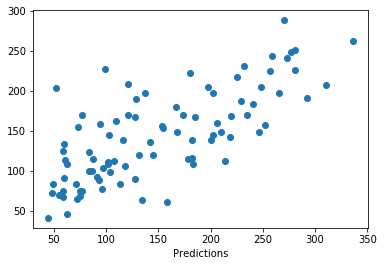

In [7]:
# plotting the model
plt.scatter(y_test, predictions)
plt.xlabel("True values")
plt.xlabel("Predictions")
plt.show()

In [8]:
print("Score", round(model.score(X_test, y_test), 3))  # printing the accuracy score

Score 0.526


### Cross-validation 

In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.
![](https://miro.medium.com/max/875/1*J2B_bcbd1-s1kpWOu_FZrg.png)
Visual representation of K-Folds. Again, H/t to Joseph Nelson!

In [9]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [10]:
# performing 6-fold cross validation on the model created earlier.
scores = cross_val_score(model, df, y, cv=6)
print("Cross-validated scores", scores)

Cross-validated scores [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


The last fold has improved the accuracy score of the model.

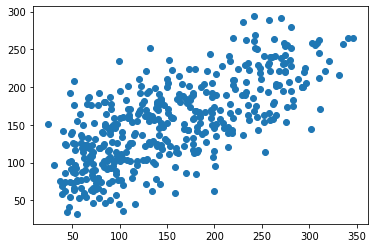

In [11]:
# predictions using the cross-validated model
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

There are 6 times as many points as the original plot as cv = 6.

In [12]:
# Checking the R2 score ie. the proportion of variance in the dependent variable that can be explained by the independent variables.

accuracy = metrics.r2_score(y, predictions)
print("The cross-validated Accuracy is {}".format(round(accuracy, 2)))

The cross-validated Accuracy is 0.49


This is the average value of all the accuracy scores from each fold of the cross-validation.